In [2]:
from census import Census
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [23]:
music_df = pd.read_csv('data.csv')
music_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [24]:
popular_music_df = music_df.sort_values(['popularity'],ascending=False)
popular_music_df = popular_music_df.head(1700)
popular_music_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
20062,0.7210,['Olivia Rodrigo'],0.585,242014,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,2021-01-08,0.0601,143.874,0.13200,2021
19862,0.2210,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,2020-07-24,0.0369,90.989,0.75600,2020
19866,0.4680,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.68200,2020
19886,0.4010,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,2020-10-30,0.0544,109.928,0.14500,2020
19976,0.2120,['KAROL G'],0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,2020-10-23,0.1520,163.908,0.83800,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76138,0.7010,['LANY'],0.559,286928,0.422,0,0Eqg0CQ7bK3RQIMPw1A7pl,0.000002,11,0.0853,-11.890,1,Malibu Nights,75,2018-10-05,0.1950,74.002,0.19100,2018
38938,0.9370,['Crafting Audio'],0.107,162407,0.236,0,3kxUcpFquT4ZdvJC1Nyu5q,0.013800,11,0.1110,-26.609,0,Cabin Noise Focus,75,2018-11-13,0.0579,80.628,0.00228,2018
39242,0.0143,"['SAINt JHN', 'Imanbek']",0.769,176867,0.719,1,0zLCBJZSiELJf02ucPP9wb,0.007770,8,0.3590,-5.472,1,Roses - Imanbek Remix,75,2020-11-20,0.0474,121.955,0.86300,2020
93794,0.1190,['jxdn'],0.554,160120,0.800,1,4GUj9MfPPkjpZskxb45uiX,0.000000,8,0.6290,-3.936,1,Angels & Demons,75,2020-05-19,0.0395,115.056,0.46300,2020


In [103]:
explicit_vs_clean = popular_music_df['explicit'].value_counts()
explicit_vs_clean

0    1094
1     606
Name: explicit, dtype: int64

In [105]:
explicit_vs_clean_df = pd.DataFrame(explicit_vs_clean).reset_index()
explicit_vs_clean_df
explicit_vs_clean_df = explicit_vs_clean_df.rename(columns={'index': 'explicitness', 'explicit': 'count'})
explicit_vs_clean_df

<AxesSubplot:xlabel='explicitness'>

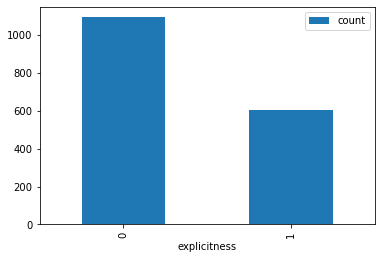

In [115]:
explicit_vs_clean_df.plot(kind = "bar", x = 'explicitness', y = 'count')



# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=140)

In [112]:
abc = popular_music_df['year'].value_counts()


In [113]:
pop_df = pd.DataFrame(abc).reset_index()
pop_abc_df = pop_df.rename(columns={'index': 'year', 'year': 'count'})
pop_abc_df
popular_1_df = pop_abc_df.sort_values(['year'],ascending=True)
popular_1_df

,year,count
63,1942,1
60,1957,2
52,1959,3
62,1961,1
50,1962,3
...,...,...
3,2017,141
2,2018,172
1,2019,254
0,2020,492


Text(0.5, 1.0, 'Songs in the Top 1% of Popularity by Year')

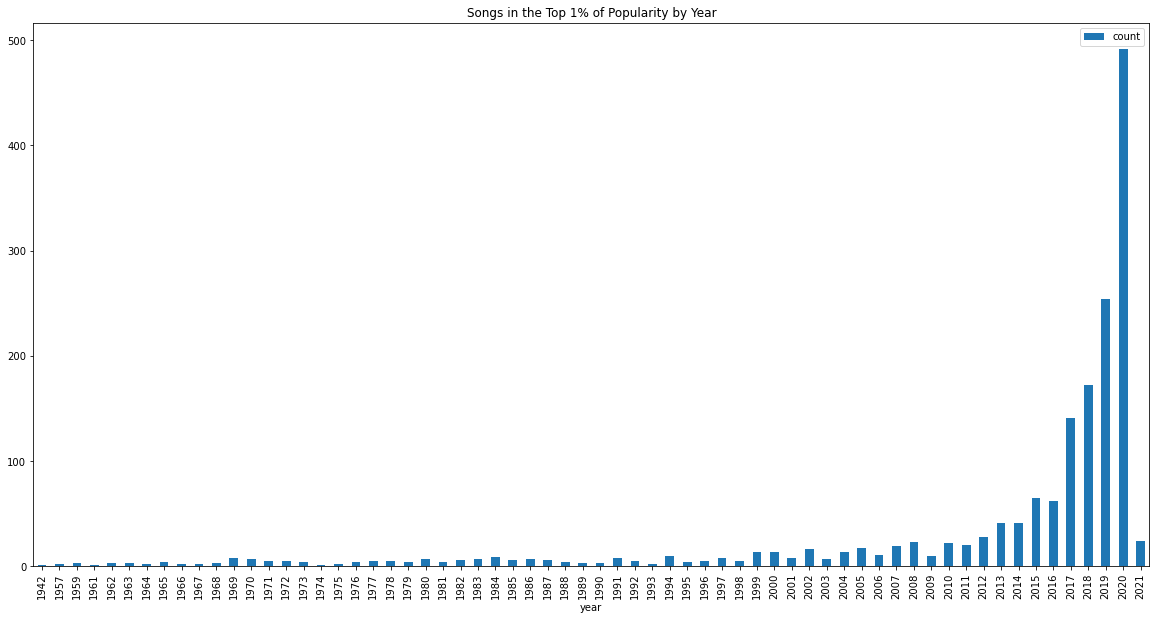

In [114]:
popular_1_df.plot(kind = "bar", x = 'year', y = 'count', figsize = (20,10))
plt.title("Songs in the Top 1% of Popularity by Year")

In [9]:
described_popular_music_df = popular_music_df.describe()
described_popular_music_df

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.249834,0.652552,209560.248235,0.624530,0.356471,0.018313,5.261765,0.169228,-6.797024,0.618235,79.095294,0.098335,120.659455,0.492517,2012.732353
std,0.263913,0.150587,50121.681609,0.185391,0.479097,0.099438,3.605185,0.127325,3.152310,0.485962,3.878721,0.097031,29.694507,0.230224,12.580037
min,0.000010,0.000000,64654.000000,0.000020,0.000000,0.000000,0.000000,0.024400,-40.449000,0.000000,75.000000,0.000000,0.000000,0.000000,1942.000000
25%,0.037350,0.552750,178867.000000,0.511000,0.000000,0.000000,2.000000,0.094375,-8.131250,0.000000,76.000000,0.037900,97.007250,0.315000,2013.000000
50%,0.151000,0.669000,205353.500000,0.640000,0.000000,0.000000,5.000000,0.119000,-6.178000,1.000000,78.000000,0.057000,120.021500,0.485000,2018.000000
75%,0.393000,0.761000,232950.000000,0.762000,1.000000,0.000067,8.000000,0.200000,-4.803000,1.000000,81.000000,0.112250,140.049250,0.669250,2020.000000
max,0.994000,0.980000,536067.000000,0.988000,1.000000,1.000000,11.000000,0.832000,-1.190000,1.000000,100.000000,0.777000,220.099000,0.979000,2021.000000
